# Detection of Infiltrate on Infant Chest X-Ray

**NIM : 14230018**

**NAMA : ILHAM MAULANA**

Source : https://github.com/k4ilham/Detection-of-Infiltrate-on-Infant-Chest-X-Ray

In [49]:
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt

In [50]:
def display_img(img, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Image')
    ax[0].axis('off')

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    ax[1].plot(hist, color='black')
    ax[1].set_title('Histogram')
    ax[1].set_xlim([0, 256])
    ax[1].set_xlabel('Pixel Intensity')
    ax[1].set_ylabel('Frequency')

    if title:
        plt.suptitle(title)

    plt.show()

# Original Image

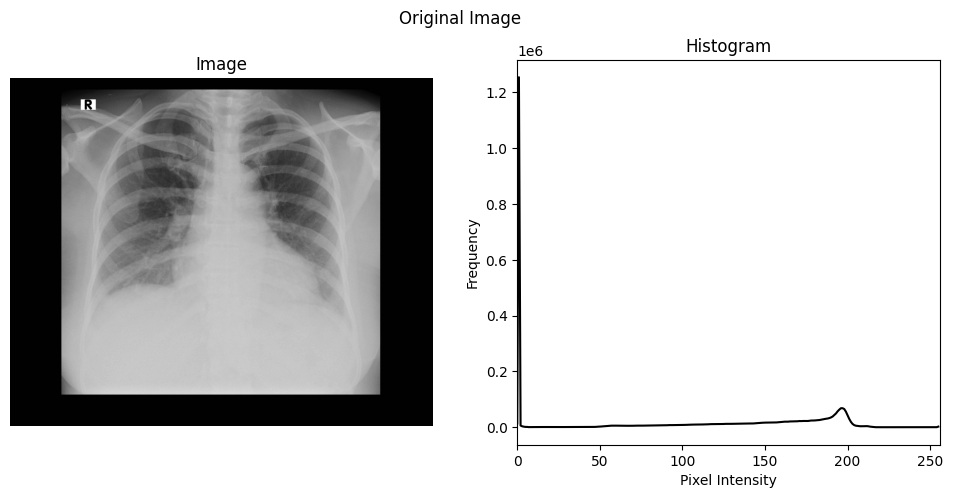

In [51]:
url = 'https://raw.githubusercontent.com/k4ilham/Detection-of-Infiltrate-on-Infant-Chest-X-Ray/main/14230018.jpg'

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

display_img(img, 'Original Image')


# Cropping

Proses pertama adalah **cropping**. Proses ini bertujuan untuk memotong area yang tidak diperlukan dalam proses selanjutnya untuk mendapatkan area infiltrasi. Teknik **cropping** mengambil area gambar masukan dari titik koordinat kiri atas hingga titik koordinat kanan bawah secara manual.

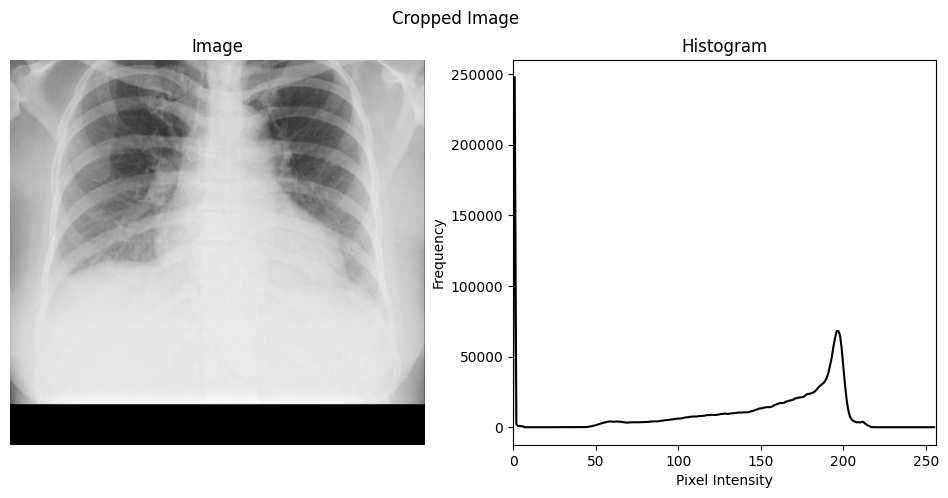

True

In [52]:
cropped_image = img[260:1874,260:1874]

display_img(cropped_image, 'Cropped Image')
cv2.imwrite("cropped_Image.jpg", cropped_image)

Hasil cropping  menunjukkan bahwa area yang tidak diperlukan untuk proses selanjutnya telah dihapus. Namun, gambar masih memiliki banyak noise. Noise adalah piksel yang mengganggu kualitas gambar dalam bentuk titik hitam atau putih yang tersebar secara acak. Untuk menghilangkan noise ini, maka akan dilakukan proses filter.

# Gaussian Filter


Proses selanjutnya setelah melakukan cropping adalah menghilangkan noise pada hasil cropping gambar. Noise adalah nilai piksel yang mengganggu kualitas gambar. Nilai piksel noise bisa terlalu rendah atau terlalu tinggi di mana nilainya terdistribusi secara acak. Noise dapat dihilangkan dengan melakukan proses **filter**. Filter adalah aktivitas untuk menghindari noise dalam proses penyesuaian nilai piksel pada tingkat nilai histogram.

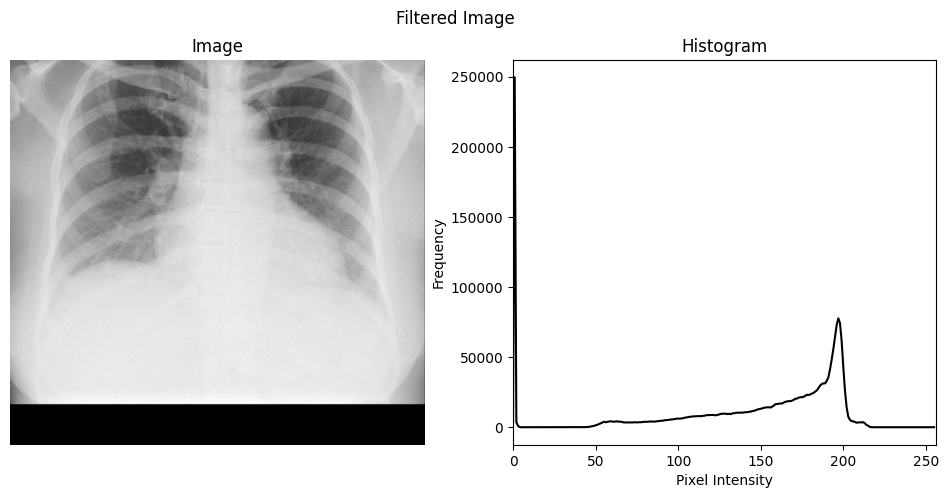

True

In [53]:
cropped_image = cv2.imread('cropped_Image.jpg')

gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

filtered = cv2.GaussianBlur(gray, (3, 3), 0)

display_img(filtered, 'Filtered Image')

cv2.imwrite("filtered_image.jpg", filtered)


# Morphology Erosion

Hasil fiter gambar masih belum terlihat dengan jelas untuk deteksi tepi objek yang terdapat dalam sinar-X dada. Untuk membentuk deteksi tepi, proses pertama yang dilakukan adalah **erosi morfologi**. Erosi morfologi adalah meminimalkan total piksel yang membentuk deteksi tepi objek.

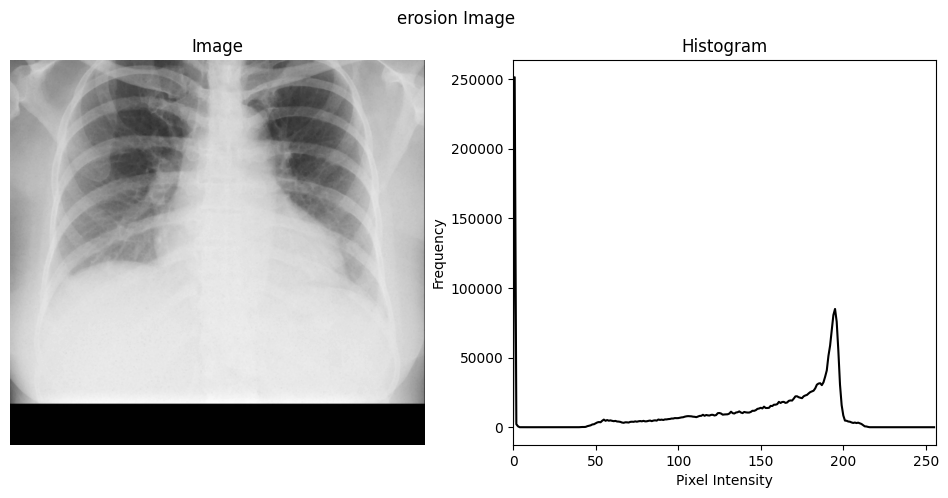

True

In [54]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(filtered, kernel, iterations=1)
display_img(erosion, 'erosion Image')
cv2.imwrite("erosion_image.jpg", erosion)

# Edge Detection

**Edge Detection** adalah proses pembentukan tepi suatu objek. Tahap ini mengurangi citra hasil penyaringan dengan citra hasil erosi morfologi.

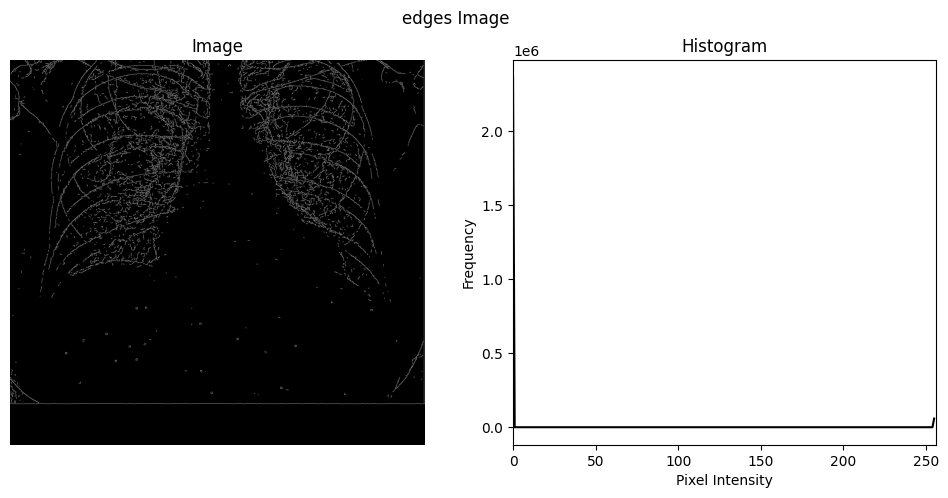

True

In [55]:
edges = cv2.Canny(erosion, 20, 30)
display_img(edges, 'edges Image')
cv2.imwrite("edges_image.jpg", edges)

# Sharpen Edge

Proses **Sharpen Edge** bertujuan untuk mempertajam tepi setiap objek dalam gambar. Nilai piksel tepi ingin ditingkatkan atau lebih tinggi dari piksel lainnya

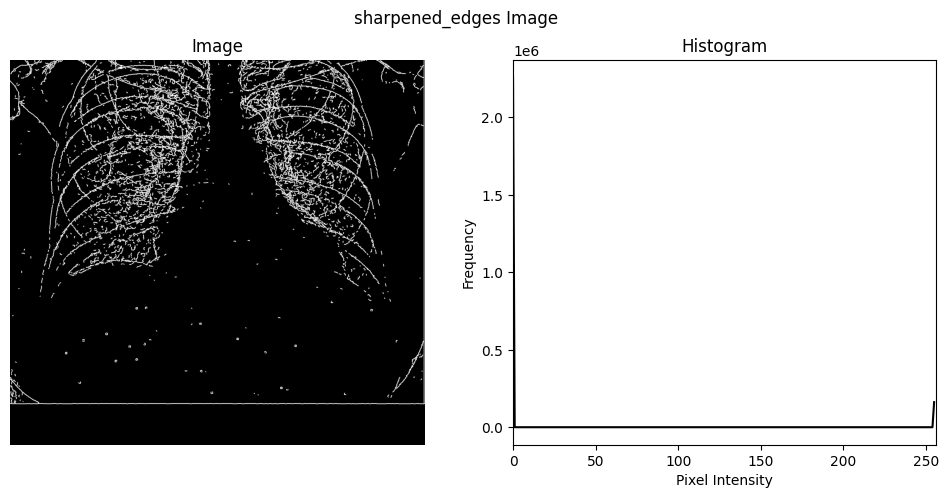

True

In [56]:
laplacian = cv2.Laplacian(edges, cv2.CV_64F)
sharpened_edges = cv2.convertScaleAbs(laplacian)
display_img(sharpened_edges, 'sharpened_edges Image')
cv2.imwrite("sharpened_edges_image.jpg", sharpened_edges)

# Conclusion

Berdasarkan tahapan proses sinar-X dada citra medis di atas, dapat dihasilkan gambar yang lebih jelas. Hasil pemrosesan gambar menampilkan deteksi tepi objek yang lebih jelas, sehingga informasi yang terkandung dalam gambar lebih mudah dikenali. Objek yang dapat diidentifikasi dengan jelas adalah infiltrat dan tulang dada. Kedetilan deteksi tepi objek akan membantu dokter dalam mengatasi keraguan dalam mengidentifikasi infiltrat pada sinar-X dada.